### Sample program for Neural Network  

#### Import libraries  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2021-09-24 09:10:08.399866: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-24 09:10:08.399889: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


#### Read CSV file  

In [2]:
dat = np.loadtxt('data/points_and.csv', delimiter=',', skiprows=1)
data_train = dat[:, :-1]
class_train = dat[:, -1]
print('data:', data_train.shape)
print('class:', class_train.shape)

data: (9, 2)
class: (9,)


#### Making model and exec training  

In [3]:
%%time
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['accuracy'])
fit_log = model.fit(data_train, class_train, epochs=3000, batch_size=1)

2021-09-24 09:10:11.642147: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-09-24 09:10:11.642180: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-24 09:10:11.642205: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (anhvu): /proc/driver/nvidia/version does not exist
2021-09-24 09:10:11.642600: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-24 09:10:12.102011: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR 

Epoch 1/3000
9/9 [==============================] - 1s 1ms/step - loss: 0.7093 - accuracy: 0.4444
Epoch 2/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.7075 - accuracy: 0.4444
Epoch 3/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.7068 - accuracy: 0.4444
Epoch 4/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.7062 - accuracy: 0.4444
Epoch 5/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.7056 - accuracy: 0.4444
Epoch 6/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.7051 - accuracy: 0.4444
Epoch 7/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.7046 - accuracy: 0.4444
Epoch 8/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.7041 - accuracy: 0.4444
Epoch 9/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.7036 - accuracy: 0.4444
Epoch 10/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.7032 - accuracy: 0.4444
Epoch 11/3000
9/9 [

#### Graph for accuracy  

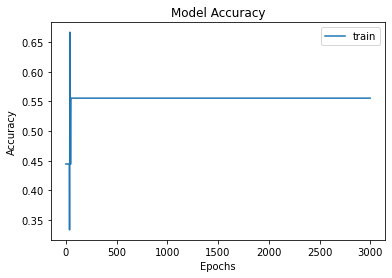

In [4]:
plt.plot(fit_log.history['accuracy'], label='train')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

#### Prediction for training data  

In [5]:
pred = model.predict(data_train)
print(pred)

[[0.43833983]
 [0.43587852]
 [0.4334313 ]
 [0.44325298]
 [0.4410801 ]
 [0.43873072]
 [0.44715276]
 [0.44543445]
 [0.44345835]]


#### Teacher signal for separating hyperplane  

In [6]:
t1 = data_train[ class_train==1 ]
t0 = data_train[ class_train==0 ]
t1_x = t1[:, 0]
t1_y = t1[:, 1]
t0_x = t0[:, 0]
t0_y = t0[:, 1]

#### Grid points for separating hyperplane  

In [7]:
g = np.loadtxt('data/grid01_21x21.csv', delimiter=',')
print(g.shape)
print(model.predict(g).shape)
pred_g = model.predict(g)[:, 0]
g1 = g[ pred_g >= 0.5 ]
g0 = g[ pred_g < 0.5 ]
g1_x = g1[:, 0]
g1_y = g1[:, 1]
g0_x = g0[:, 0]
g0_y = g0[:, 1]

(441, 2)
(441, 1)


#### Plot of separating hyperplane  

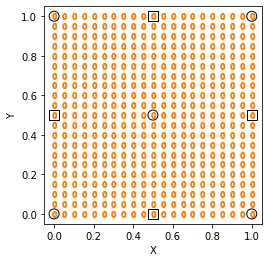

In [8]:
plt.scatter(t1_x, t1_y, marker='s', facecolor='none', edgecolor='black', s=100)
plt.scatter(t0_x, t0_y, marker='o', facecolor='none', edgecolor='black', s=100)
plt.scatter(g1_x, g1_y, marker='$1$')
plt.scatter(g0_x, g0_y, marker='$0$')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()